In [4]:
import numpy as np
import matplotlib.pyplot as plt
from emilys.image.arrayplot import arrayplot2d
%matplotlib inline

In [10]:
# development imports with autoreload
%load_ext autoreload
%autoreload 1

In [11]:
# development import specifics
%aimport emilys.image.kernels

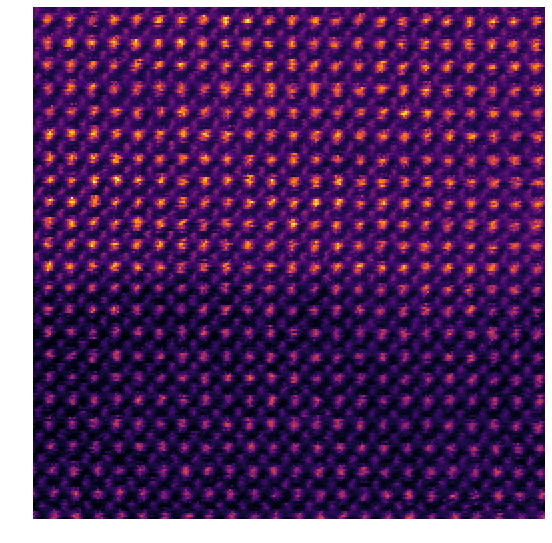

In [25]:
# load an image file and show it
nx = 256
ny = 256
img0 = np.fromfile('../data/scan-image.dat', dtype=np.uint16).astype(float).reshape(ny,nx) # convert to float
arrayplot2d(img0, 2, 'inferno');

In [89]:
# Define a feature size threshold in pixels
# Set this to the approximate size of features you want to detect
sthr = 2.5
# Define a feature distance threshold in pixels
# Set this to the approximate distance between features you want to separate
dthr = 10.
kernf = emilys.image.kernels.bwl_gaussian(img0.shape, sthr/2)
kernd = emilys.image.kernels.bwl_gaussian(img0.shape, dthr)

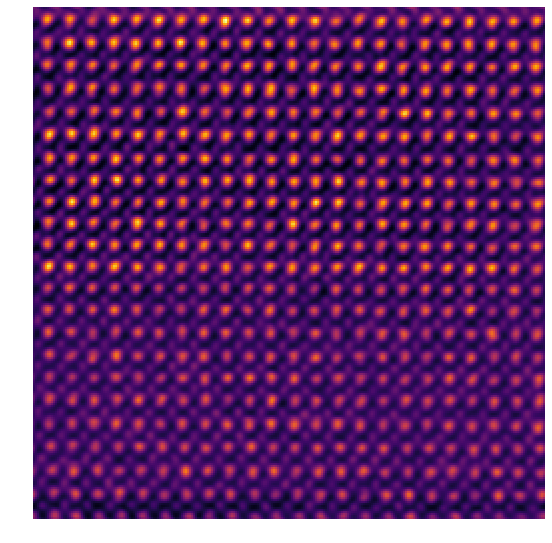

In [90]:
# Convolute the image with the kernels
ft_img0 = np.fft.fft2(img0)
ft_kernf = np.fft.fft2(kernf)
ft_kernd = np.fft.fft2(kernd)
# feature + background
imglpf = np.real( np.fft.ifft2( ft_img0 * np.conjugate(ft_kernf) ) )
# background
imglpd = np.real( np.fft.ifft2( ft_img0 * np.conjugate(ft_kernd) ) )
# plot features
arrayplot2d(imglpf-imglpd, 2, 'inferno');

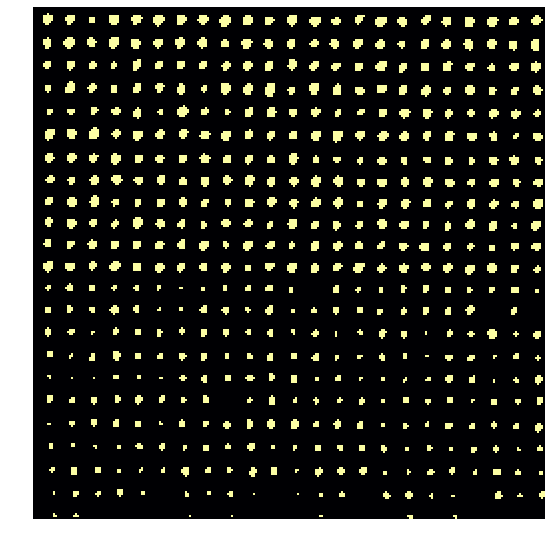

In [93]:
# Define an acceptable signal to noise ratio!
asnr = 2.
# Get noise estimate from high pass
imghpf = img0 - imglpf
s0 = asnr * np.sqrt(np.sum(imghpf**2)/ (nx*ny)) # asnr * sigma per pixel
# Scale freature image with respect to noise level and flag peak pixels
pf_img = (np.tanh(100.*np.pi*((imglpf-imglpd) / s0 - 1.))*0.5 + 1.).astype(int)
# plot peak flags
arrayplot2d(pf_img, 2, 'inferno');

In [ ]:
# cluster flags
# delete small clusters
# fit peak functions at cluster areas
# 